In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_dtframe = pd.read_csv(r"F:\wenqu\DOE_Arctic_project\spectral\site2a_band_statistic.csv")
file_dtframe

,Unnamed: 0,weighted_sla,weighted_la,weighted_LDMC,b1_mean,b2_mean,b3_mean,b4_mean,b5_mean,b6_mean,...,b113_std,b114_std,b115_std,b116_std,b117_std,b118_std,b119_std,b120_std,b121_std,b122_std
0,site2a_qu_1,156.433107,14.136250,0.383363,0.034215,0.025674,0.027261,0.020057,0.018064,0.018009,...,0.106693,0.090803,0.100144,0.095355,0.087500,0.089651,0.086441,0.088809,0.092777,0.103487
1,site2a_qu_10,103.274730,7.685520,0.431687,0.025130,0.021349,0.017708,0.013147,0.011564,0.013195,...,0.066307,0.060369,0.056838,0.062961,0.058079,0.053972,0.054655,0.053167,0.059931,0.066890
2,site2a_qu_11,80.669833,1.895693,0.533587,0.037116,0.028136,0.027556,0.022787,0.022009,0.021122,...,0.147961,0.148489,0.137109,0.141940,0.147016,0.137352,0.143938,0.143416,0.132508,0.157942
3,site2a_qu_12,102.828431,1.776364,0.756281,0.009131,0.014486,0.009359,0.010267,0.008580,0.009717,...,0.080970,0.077439,0.082271,0.070964,0.074677,0.075373,0.075561,0.075743,0.077886,0.089153
4,site2a_qu_13,82.917004,1.410099,0.497387,0.013592,0.017636,0.015679,0.011988,0.009930,0.009121,...,0.048441,0.044967,0.039642,0.039218,0.035964,0.038140,0.039319,0.033442,0.040686,0.052364
5,site2a_qu_14,30.659484,2.730000,4.521977,0.034507,0.027230,0.023196,0.019779,0.017947,0.017344,...,0.076851,0.074534,0.069335,0.064276,0.069769,0.071846,0.074753,0.071547,0.067606,0.079951
6,site2a_qu_15,89.337309,29.536792,0.586036,0.035638,0.038242,0.027876,0.025192,0.022157,0.022463,...,0.056092,0.049808,0.044308,0.047534,0.047925,0.044334,0.046059,0.046897,0.043516,0.050899
7,site2a_qu_16,97.785248,4.113333,0.805351,0.017057,0.015493,0.013768,0.008787,0.008985,0.008804,...,0.054683,0.048188,0.042042,0.041654,0.043026,0.040731,0.037407,0.041577,0.042292,0.052040
8,site2a_qu_17,82.951976,4.587846,0.805099,0.023428,0.021236,0.018418,0.014082,0.011591,0.010540,...,0.088216,0.078034,0.081361,0.084388,0.081031,0.083409,0.078209,0.076632,0.079694,0.086043
9,site2a_qu_18,40.134117,3.774646,2.314792,0.032425,0.027022,0.025710,0.020785,0.019971,0.018364,...,0.087878,0.076802,0.075321,0.078251,0.080518,0.078628,0.076100,0.076520,0.080627,0.095732


In [3]:
b_name_mean = []
b_name_std = []
for i in range(1, 123):
    b_mean = 'b' + str(i) + '_mean'
    b_name_mean.append(b_mean)
    b_std = 'b' + str(i) + '_std'
    b_name_std.append(b_std)
band_name = b_name_mean + b_name_std
# band_name

In [4]:
y_weighted_sla = file_dtframe['weighted_sla']
y_weighted_la = file_dtframe['weighted_la']
y_weighted_LDMC = file_dtframe['weighted_LDMC']
x = file_dtframe[band_name]
x

,b1_mean,b2_mean,b3_mean,b4_mean,b5_mean,b6_mean,b7_mean,b8_mean,b9_mean,b10_mean,...,b113_std,b114_std,b115_std,b116_std,b117_std,b118_std,b119_std,b120_std,b121_std,b122_std
0,0.034215,0.025674,0.027261,0.020057,0.018064,0.018009,0.018486,0.018898,0.020460,0.026713,...,0.106693,0.090803,0.100144,0.095355,0.087500,0.089651,0.086441,0.088809,0.092777,0.103487
1,0.025130,0.021349,0.017708,0.013147,0.011564,0.013195,0.011355,0.011545,0.012571,0.015670,...,0.066307,0.060369,0.056838,0.062961,0.058079,0.053972,0.054655,0.053167,0.059931,0.066890
2,0.037116,0.028136,0.027556,0.022787,0.022009,0.021122,0.018811,0.020257,0.019705,0.026167,...,0.147961,0.148489,0.137109,0.141940,0.147016,0.137352,0.143938,0.143416,0.132508,0.157942
3,0.009131,0.014486,0.009359,0.010267,0.008580,0.009717,0.010913,0.010354,0.011842,0.015347,...,0.080970,0.077439,0.082271,0.070964,0.074677,0.075373,0.075561,0.075743,0.077886,0.089153
4,0.013592,0.017636,0.015679,0.011988,0.009930,0.009121,0.008895,0.008532,0.008990,0.012763,...,0.048441,0.044967,0.039642,0.039218,0.035964,0.038140,0.039319,0.033442,0.040686,0.052364
5,0.034507,0.027230,0.023196,0.019779,0.017947,0.017344,0.017396,0.018081,0.019216,0.024143,...,0.076851,0.074534,0.069335,0.064276,0.069769,0.071846,0.074753,0.071547,0.067606,0.079951
6,0.035638,0.038242,0.027876,0.025192,0.022157,0.022463,0.023450,0.023262,0.026352,0.033861,...,0.056092,0.049808,0.044308,0.047534,0.047925,0.044334,0.046059,0.046897,0.043516,0.050899
7,0.017057,0.015493,0.013768,0.008787,0.008985,0.008804,0.007798,0.007623,0.008450,0.009948,...,0.054683,0.048188,0.042042,0.041654,0.043026,0.040731,0.037407,0.041577,0.042292,0.052040
8,0.023428,0.021236,0.018418,0.014082,0.011591,0.010540,0.011702,0.011963,0.012651,0.017351,...,0.088216,0.078034,0.081361,0.084388,0.081031,0.083409,0.078209,0.076632,0.079694,0.086043
9,0.032425,0.027022,0.025710,0.020785,0.019971,0.018364,0.018322,0.019109,0.020591,0.027097,...,0.087878,0.076802,0.075321,0.078251,0.080518,0.078628,0.076100,0.076520,0.080627,0.095732


In [9]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
 
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
 
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)[:, 0]
    print(y.mean(), y.min(), y.max(), y.shape)
    print(y_cv.mean(), y_cv.min(), y_cv.max(), y_cv.shape)
    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    
    p_corr, p_value = pearsonr(y, y_cv)
    print(p_corr, p_value)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
 
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
 
        plt.show()
 
    return

65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


77% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25


97% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


100% completed
Suggested number of components:  14



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26


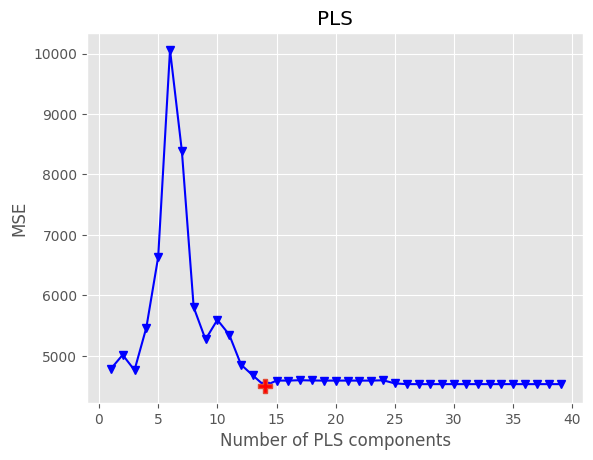

96.52191084296295 30.65948379 393.4752836 (27,)
96.69690939126386 -1.0059938585797 223.2849980325977 (27,)
0.33503665824951956 0.08758117546531716
R2 calib: 0.999
R2 CV: -0.080
MSE calib: 4.899
MSE CV: 4501.866


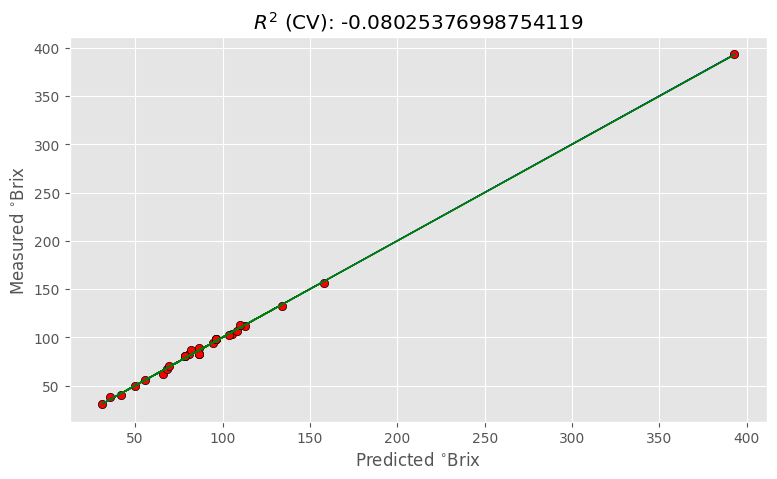

In [10]:
optimise_pls_cv(x,y_weighted_sla, 40, plot_components=True)

65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


72% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


92% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


100% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25



Suggested number of components:  1



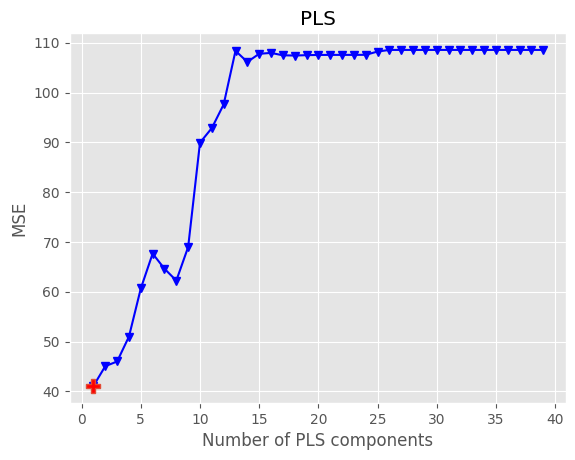

4.642357199666667 0.382217195 29.53679245 (27,)
4.856262388682483 -1.003116649174232 11.194913868335128 (27,)
0.011091405039405006 0.95621250796332
R2 calib: 0.178
R2 CV: -0.246
MSE calib: 27.112
MSE CV: 41.083


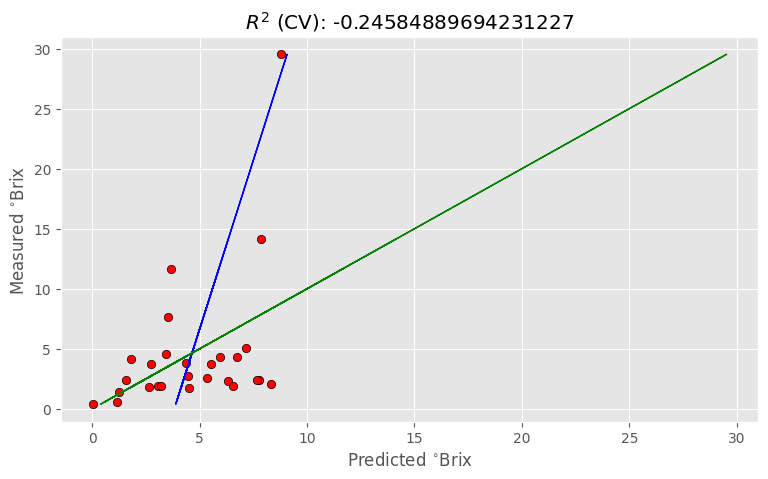

In [11]:
optimise_pls_cv(x,y_weighted_la, 40, plot_components=True)

67% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25


72% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25


87% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 27
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 27


100% completed
Suggested number of components:  1



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25


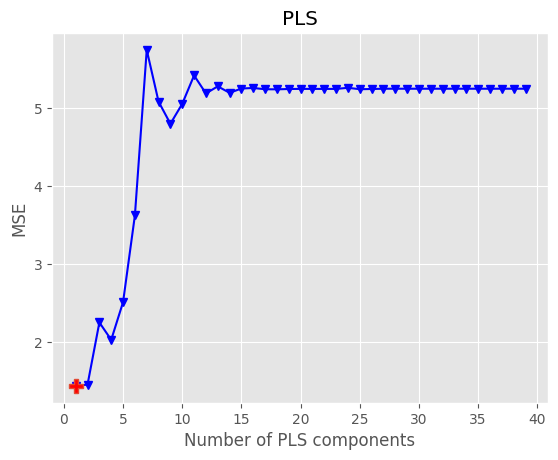

1.0552241752592595 0.312566614 4.741855139 (27,)
1.1365409194212435 0.59004860413157 2.0324881250650315 (27,)
-0.10377386057095625 0.6064805360641474
R2 calib: 0.074
R2 CV: -0.188
MSE calib: 1.120
MSE CV: 1.437


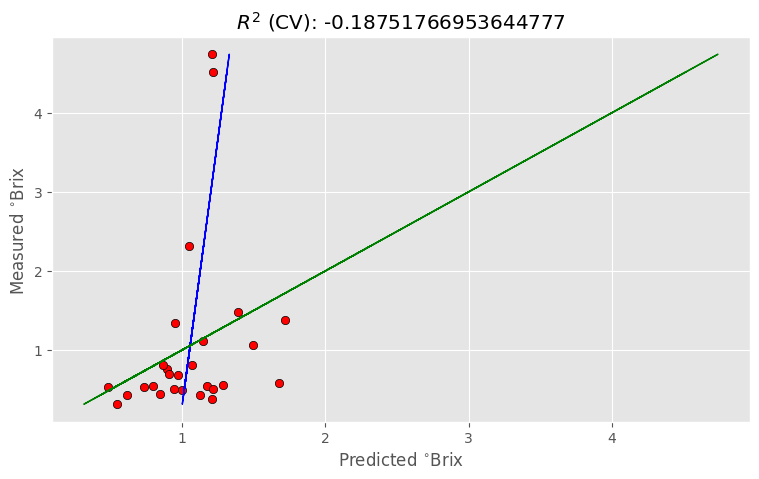

In [12]:
optimise_pls_cv(x,y_weighted_LDMC, 40, plot_components=True)

In [13]:
log_y_weighted_sla = np.log(y_weighted_sla)
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_LDMC = np.log(y_weighted_LDMC)

67% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


72% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


87% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25


92% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25


100% completed
Suggested number of components:  2



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


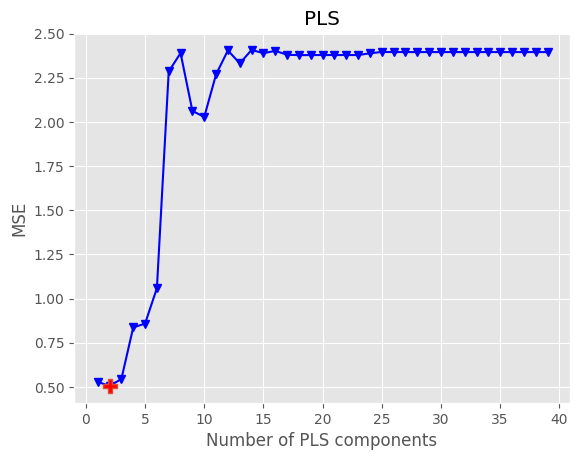

-0.2473822253827701 -1.1629376677220686 1.5564284386738574 (27,)
-0.19178467869806715 -0.7785678024950602 0.6746308899973392 (27,)
0.15199102798408431 0.4491630743781912
R2 calib: 0.190
R2 CV: -0.091
MSE calib: 0.375
MSE CV: 0.506


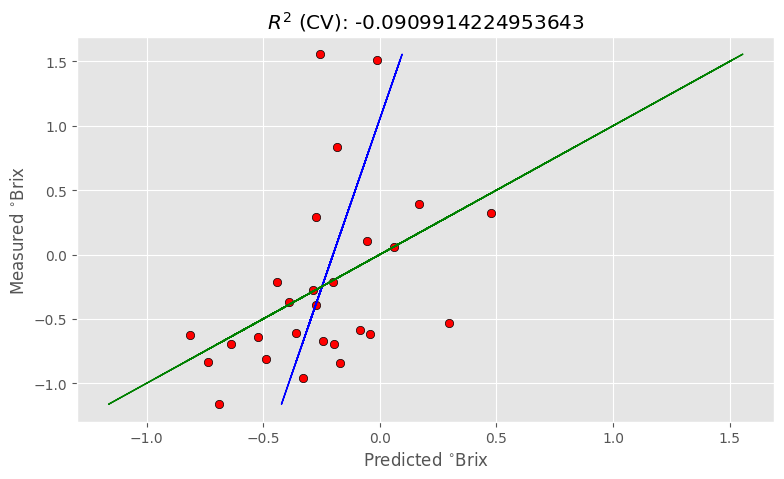

In [14]:
optimise_pls_cv(x,log_y_weighted_LDMC, 40, plot_components=True)

65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


72% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


77% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


92% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


97% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


100% completed
Suggested number of components:  10



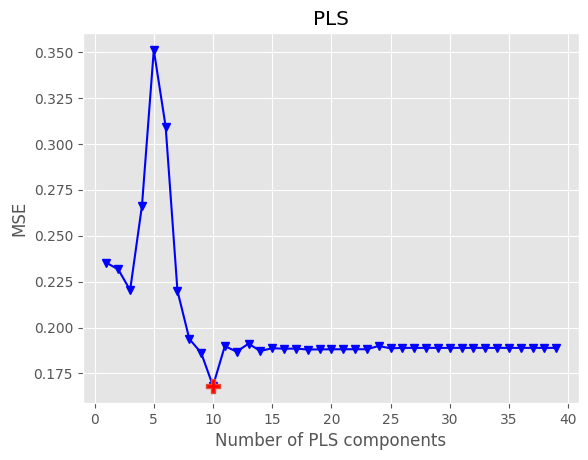

4.438176761842703 3.422942036707019 5.975018254194759 (27,)
4.401623284301848 3.3918380270363464 5.220099767210391 (27,)
0.5915374601676624 0.0011550279827892212
R2 calib: 0.952
R2 CV: 0.267
MSE calib: 0.011
MSE CV: 0.168


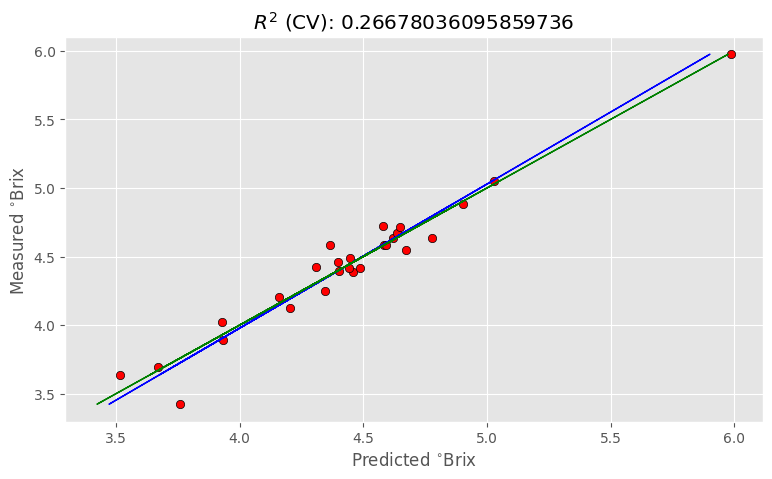

In [15]:
optimise_pls_cv(x,log_y_weighted_sla, 40, plot_components=True)

67% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


72% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24


92% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 25
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


100% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 24
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 26



Suggested number of components:  1



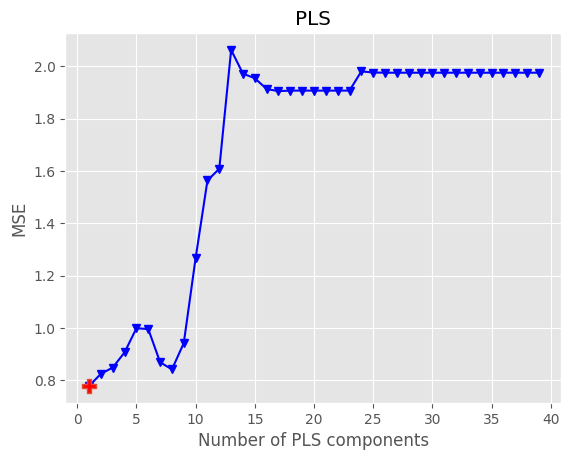

1.1144928429247491 -0.9617662586536878 3.3856366879307305 (27,)
1.1537356909405756 0.3689031895481 2.1204143599657908 (27,)
0.23768212662174715 0.23255866862124552
R2 calib: 0.227
R2 CV: -0.030
MSE calib: 0.584
MSE CV: 0.778


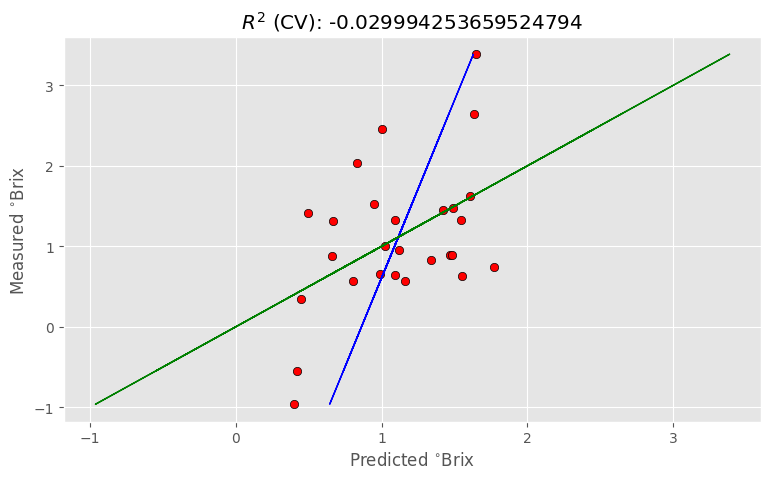

In [16]:
optimise_pls_cv(x,log_y_weighted_la, 40, plot_components=True)